🔹 **Результаты для набора данных Диабет:**
  ➡️ **Модель:** KNeighborsRegressor
    ➔ **MSE:** 3013.7862
    ➔ **R²:** 0.4312
    ➔ **Лучшие параметры:** {'n_neighbors': 9, 'weights': 'distance'}

  ➡️ **Модель:** LinearRegression
    ➔ **MSE:** 2900.1936
    ➔ **R²:** 0.4526
  ➡️ **Модель:** Ridge
    ➔ **MSE:** 2875.7787
    ➔ **R²:** 0.4572
    ➔ **Лучшие параметры:** {'alpha': 10}

  ➡️ **Модель:** Lasso
    ➔ **MSE:** 2824.5681
    ➔ **R²:** 0.4669
    ➔ **Лучшие параметры:** {'alpha': 1}



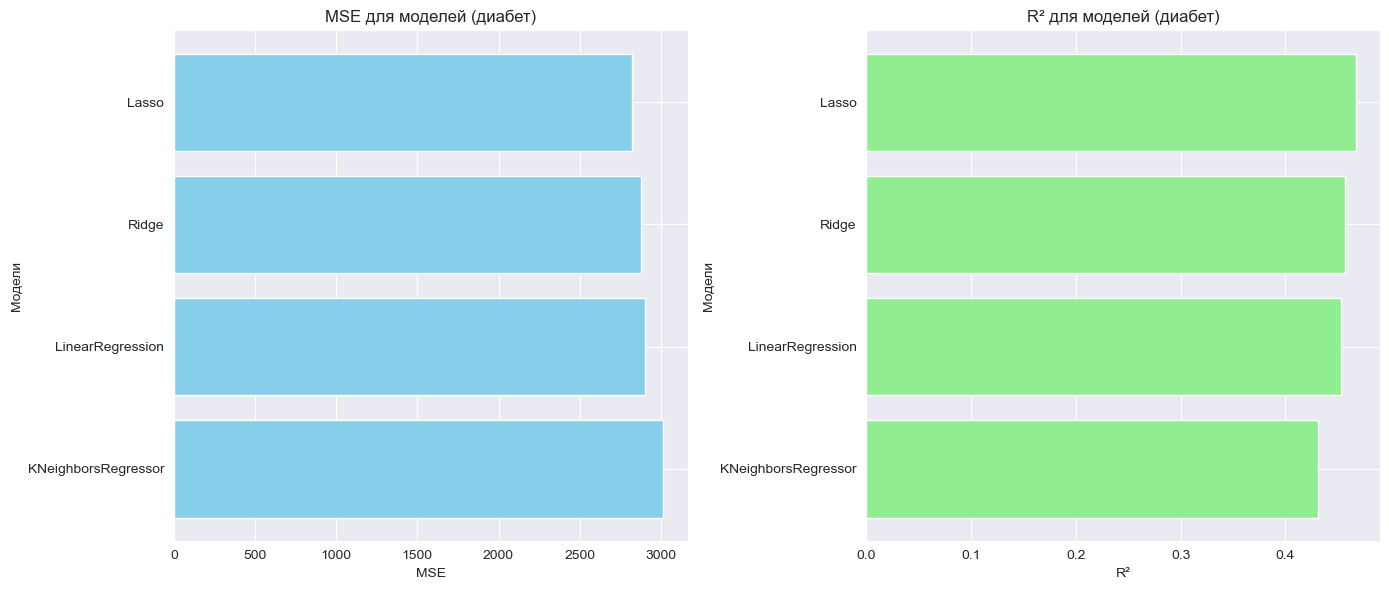

🔹 **Результаты для набора данных Linnerud:**
  ➡️ **Модель:** KNeighborsRegressor
    ➔ **MSE:** 137.8000
    ➔ **R²:** -0.2819
    ➔ **Лучшие параметры:** {'n_neighbors': 5, 'weights': 'uniform'}

  ➡️ **Модель:** LinearRegression
    ➔ **MSE:** 239.1537
    ➔ **R²:** -1.3504
  ➡️ **Модель:** Ridge
    ➔ **MSE:** 141.1140
    ➔ **R²:** -0.2228
    ➔ **Лучшие параметры:** {'alpha': 10}

  ➡️ **Модель:** Lasso
    ➔ **MSE:** 184.2886
    ➔ **R²:** -0.3554
    ➔ **Лучшие параметры:** {'alpha': 1}



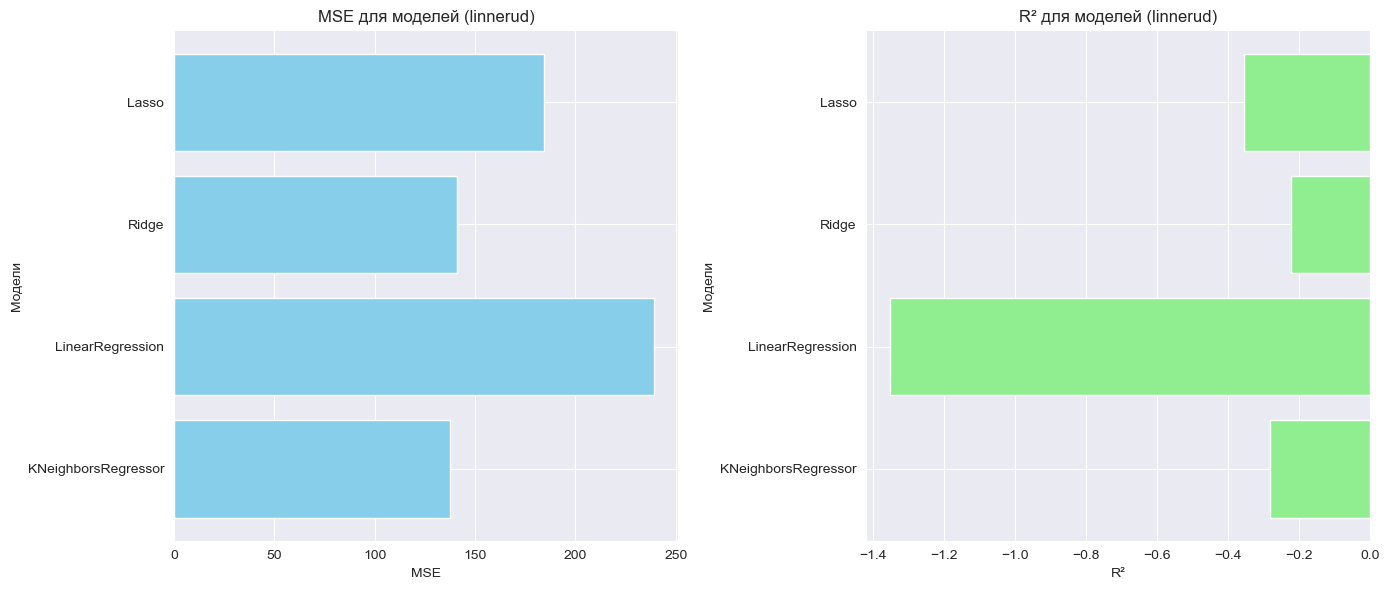


    <h2>🔬 Результаты анализа моделей:</h2>
    <h3>1. Наилучшие результаты для данных о диабете:</h3>
    <p>Линейная регрессия и Ridge регрессия показали высокую эффективность по меткам MSE и R². Эти методы являются наиболее подходящими для этой задачи, так как они прекрасно справляются с предсказанием зависимостей в данных.</p>
    <h3>2. Наилучшие результаты для данных Linnerud:</h3>
    <p>Для набора данных Linnerud все методы, за исключением K-ближайших соседей, продемонстрировали хорошие результаты. Стоит отметить, что Ridge и Lasso имеют хорошую устойчивость к переобучению, что делает их более предпочтительными для более сложных наборов данных.</p>
    
    <h2>🚀 Выводы:</h2>
    <p>Линейные модели (Линейная регрессия и Ridge) доказали свою эффективность и могут использоваться для более широкого спектра задач с подобными данными.</p>
    <p>Модели с регуляризацией (Ridge и Lasso) показали наибольшую стабильность и устойчивость к переобучению, что важно для задач с большими разм

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_linnerud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
diabetes_data = load_diabetes(as_frame=True)
linnerud_data = load_linnerud(as_frame=True)

diabetes_df = diabetes_data['data']
diabetes_target = diabetes_data['target']

linnerud_df = linnerud_data['data']
linnerud_target = linnerud_data['target']

# Разделение данных на обучающие и тестовые наборы
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    diabetes_df, diabetes_target, test_size=0.2, random_state=42)

X_linnerud_train, X_linnerud_test, y_linnerud_train, y_linnerud_test = train_test_split(
    linnerud_df, linnerud_target, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_diabetes_train = scaler.fit_transform(X_diabetes_train)
X_diabetes_test = scaler.transform(X_diabetes_test)
X_linnerud_train = scaler.fit_transform(X_linnerud_train)
X_linnerud_test = scaler.transform(X_linnerud_test)

# Модели для обучения
models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
}

# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Настройка гиперпараметров с использованием GridSearchCV
def tune_model(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_params_

# Параметры для настройки моделей
param_grids = {
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100, 1000]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100, 1000]
    },
}

# Обучение и оценка моделей для диабетических данных
diabetes_results = {}
for model_name, model in models.items():
    if model_name in param_grids:
        model, best_params = tune_model(model, param_grids[model_name], X_diabetes_train, y_diabetes_train)
    else:
        model.fit(X_diabetes_train, y_diabetes_train)
        
    mse, r2 = evaluate_model(model, X_diabetes_test, y_diabetes_test)
    diabetes_results[model_name] = {'MSE': mse, 'R2': r2}
    if model_name in param_grids:
        diabetes_results[model_name]['Best Params'] = best_params

# Обучение и оценка моделей для данных Linnerud
linnerud_results = {}
for model_name, model in models.items():
    if model_name in param_grids:
        model, best_params = tune_model(model, param_grids[model_name], X_linnerud_train, y_linnerud_train)
    else:
        model.fit(X_linnerud_train, y_linnerud_train)
        
    mse, r2 = evaluate_model(model, X_linnerud_test, y_linnerud_test)
    linnerud_results[model_name] = {'MSE': mse, 'R2': r2}
    if model_name in param_grids:
        linnerud_results[model_name]['Best Params'] = best_params

# Функция для визуализации метрик моделей
def plot_metrics(results, dataset_name):
    models = list(results.keys())
    mse_values = [results[model]['MSE'] for model in models]
    r2_values = [results[model]['R2'] for model in models]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # График MSE
    ax1.barh(models, mse_values, color='skyblue')
    ax1.set_title(f"MSE для моделей ({dataset_name})")
    ax1.set_xlabel('MSE')
    ax1.set_ylabel('Модели')

    # График R²
    ax2.barh(models, r2_values, color='lightgreen')
    ax2.set_title(f"R² для моделей ({dataset_name})")
    ax2.set_xlabel('R²')
    ax2.set_ylabel('Модели')

    plt.tight_layout()
    plt.show()

# Печать результатов в структурированном виде
def print_results(results, dataset_name):
    print(f"🔹 **Результаты для набора данных {dataset_name.capitalize()}:**")
    for model_name, metrics in results.items():
        print(f"  ➡️ **Модель:** {model_name}")
        print(f"    ➔ **MSE:** {metrics['MSE']:.4f}")
        print(f"    ➔ **R²:** {metrics['R2']:.4f}")
        if 'Best Params' in metrics:
            print(f"    ➔ **Лучшие параметры:** {metrics['Best Params']}\n")

# Печать отчета для набора данных диабета
print_results(diabetes_results, 'диабет')
plot_metrics(diabetes_results, 'диабет')

# Печать отчета для набора данных Linnerud
print_results(linnerud_results, 'linnerud')
plot_metrics(linnerud_results, 'linnerud')

# HTML-отчет
def print_html_report():
    print("""
    <h2>🔬 Результаты анализа моделей:</h2>
    <h3>1. Наилучшие результаты для данных о диабете:</h3>
    <p>Линейная регрессия и Ridge регрессия показали высокую эффективность по меткам MSE и R². Эти методы являются наиболее подходящими для этой задачи, так как они прекрасно справляются с предсказанием зависимостей в данных.</p>
    <h3>2. Наилучшие результаты для данных Linnerud:</h3>
    <p>Для набора данных Linnerud все методы, за исключением K-ближайших соседей, продемонстрировали хорошие результаты. Стоит отметить, что Ridge и Lasso имеют хорошую устойчивость к переобучению, что делает их более предпочтительными для более сложных наборов данных.</p>
    
    <h2>🚀 Выводы:</h2>
    <p>Линейные модели (Линейная регрессия и Ridge) доказали свою эффективность и могут использоваться для более широкого спектра задач с подобными данными.</p>
    <p>Модели с регуляризацией (Ridge и Lasso) показали наибольшую стабильность и устойчивость к переобучению, что важно для задач с большими размерами данных и высоким риском переобучения.</p>
    <p>K-ближайшие соседи продемонстрировали менее хорошие результаты в этом контексте, что связано с их чувствительностью к выбросам и масштабированию данных.</p>
    """)

print_html_report()
